# Exploring `build_shapes.py` outputs

### Jupyter notebook needs to be improves

In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import pypsa
import shutil
from rasterio.plot import show

import os
import sys
sys.path.append('../')  # to import helpers
from scripts._helpers import _sets_path_to_root
_sets_path_to_root("pypsa-africa")

This is the repository path:  /home/max/OneDrive/PHD-Flexibility/07_pypsa-africa/0github/pypsa-africa/pypsa-africa
Had to go 1 folder(s) up.


<AxesSubplot:>

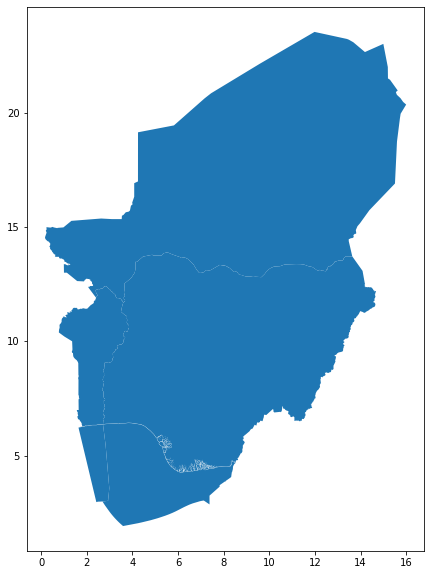

In [2]:
continent = gpd.read_file('resources/country_shapes.geojson')
off_shore = gpd.read_file('resources/offshore_shapes.geojson')
off_shore_old = gpd.read_file('resources/offshore_shapes.geojson')
gadm = gpd.read_file('resources/gadm_shapes.geojson')

ax = continent.plot(figsize=(10,10))
off_shore.plot(ax=ax)

In [3]:
off_shore_old

,name,geometry
0,BJ,"POLYGON ((2.82397 5.44567, 2.98419 3.57678, 2...."
1,NG,"MULTIPOLYGON (((8.54140 4.70052, 8.53477 4.698..."


<AxesSubplot:>

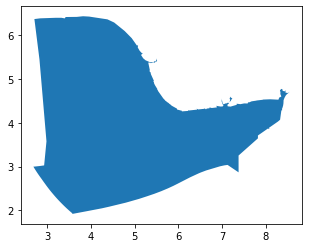

In [4]:
off_shore2 = off_shore[off_shore.name == "NG"]
off_shore2.plot()

In [5]:
off_shore

,name,geometry
0,BJ,"POLYGON ((2.82397 5.44567, 2.98419 3.57678, 2...."
1,NG,"MULTIPOLYGON (((8.54140 4.70052, 8.53477 4.698..."


<AxesSubplot:>

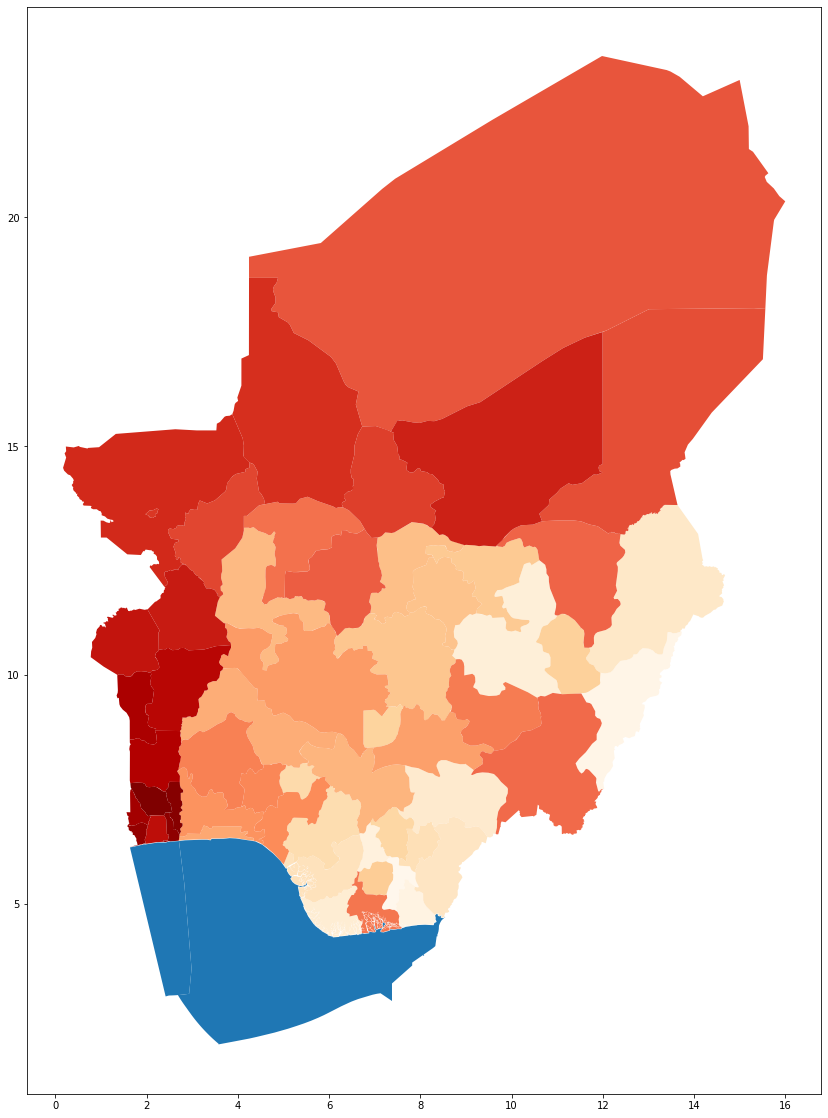

In [6]:
ax2= gadm.plot(cmap='OrRd', figsize=(20, 20), legend=True) #column="pop", 
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_pop.pdf")

<AxesSubplot:>

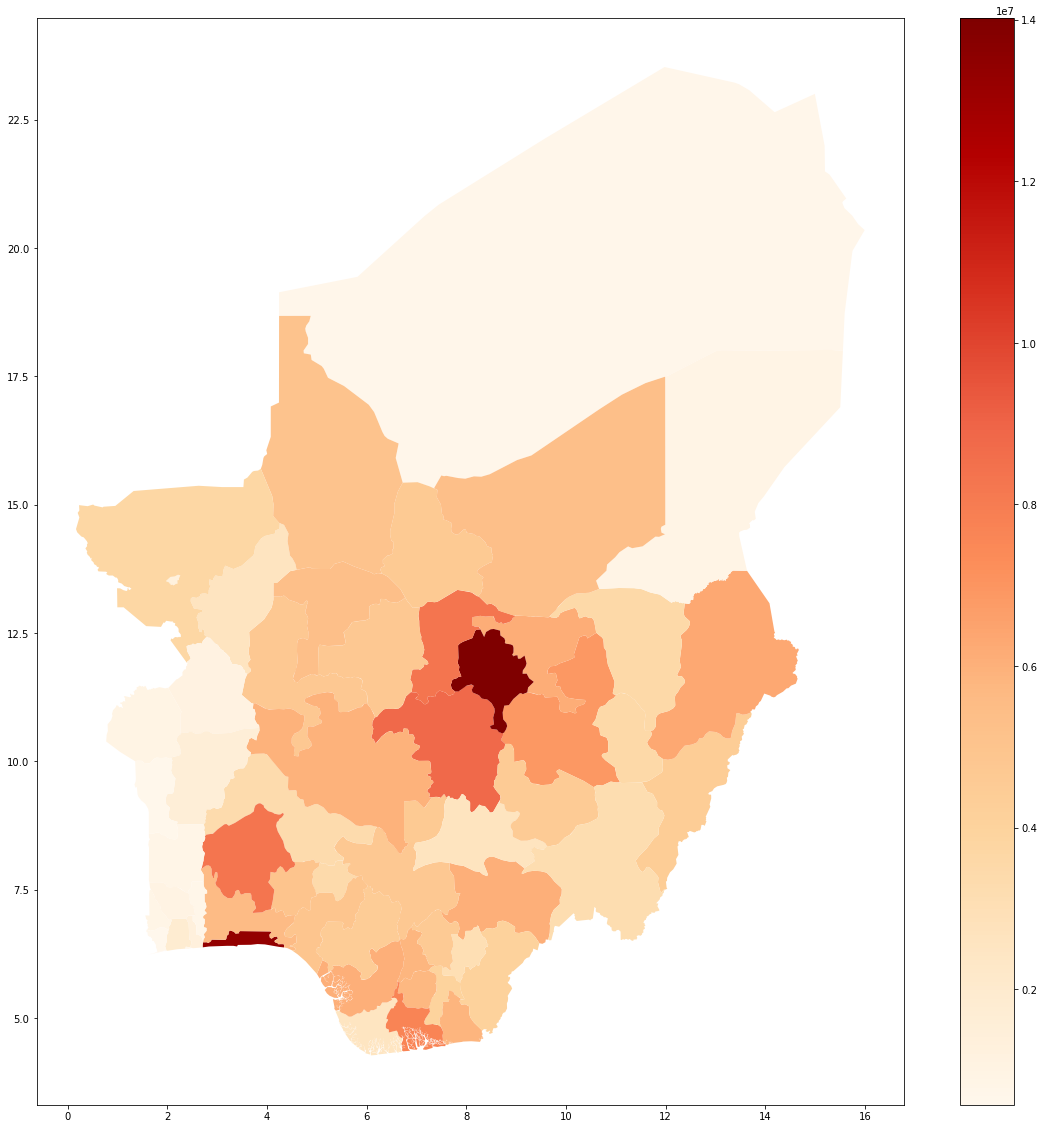

In [7]:
ax3= gadm.plot(column="pop", cmap='OrRd', figsize=(20, 20), legend=True)
off_shore.plot(ax=ax2, label="offshore")
# plt.savefig("gadm_gdp.pdf")

In [8]:
gadm[gadm["country"]=="NG"]

,GADM_ID,country,pop,gdp,geometry
0,NGA.1_1,NG,3992493.75,3.518718e+10,"POLYGON ((7.48998 4.85506, 7.49298 4.81540, 7...."
1,NGA.2_1,NG,4448888.50,1.539864e+10,"POLYGON ((12.01237 7.50763, 11.96035 7.49500, ..."
2,NGA.3_1,NG,5876820.00,3.615239e+10,"MULTIPOLYGON (((7.61903 4.47458, 7.60736 4.473..."
3,NGA.4_1,NG,5791724.50,4.080291e+10,"POLYGON ((7.25012 5.92631, 7.16414 5.90343, 7...."
4,NGA.5_1,NG,6927185.50,2.347565e+10,"POLYGON ((11.01984 9.70526, 11.08022 9.60422, ..."
5,NGA.6_1,NG,2531341.75,2.401713e+10,"MULTIPOLYGON (((5.96159 4.37265, 5.96625 4.335..."
6,NGA.7_1,NG,6082070.50,3.958809e+10,"POLYGON ((7.82773 6.63027, 7.86461 6.73401, 7...."
7,NGA.8_1,NG,6301968.00,1.946004e+10,"POLYGON ((11.94555 10.04476, 11.85308 10.10558..."
8,NGA.9_1,NG,4066164.50,3.040949e+10,"POLYGON ((8.47764 4.69097, 8.45569 4.70014, 8...."
9,NGA.10_1,NG,6039778.50,4.924611e+10,"MULTIPOLYGON (((6.29385 5.26614, 6.27019 5.229..."


In [9]:
gadm[gadm.country=="NG"].sum()

/tmp/ipykernel_576409/3688828674.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gadm[gadm.country=="NG"].sum()


GADM_ID    NGA.1_1NGA.2_1NGA.3_1NGA.4_1NGA.5_1NGA.6_1NGA....
country    NGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNGNG...
pop                                              206538714.5
gdp                                          1194938552320.0
dtype: object

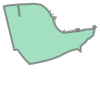

In [10]:
g1 = off_shore.loc[0, "geometry"]
g2 = off_shore.loc[1, "geometry"]
g3 = g1.union(g2)
g3

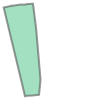

In [11]:
g1

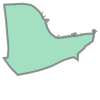

In [12]:
g2

In [13]:
off_shore2 = off_shore.copy()
off_shore2 = off_shore2[off_shore2.name =="NG"]

<AxesSubplot:>

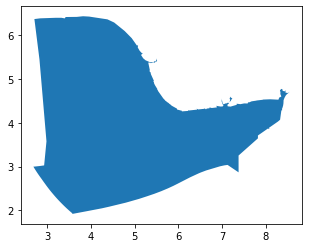

In [14]:
off_shore2.plot()

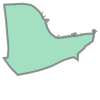

In [15]:
off_shore2.loc[1, "geometry"]

In [16]:
(off_shore.name == "MA").sum()

0

<AxesSubplot:>

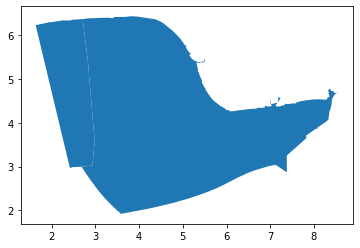

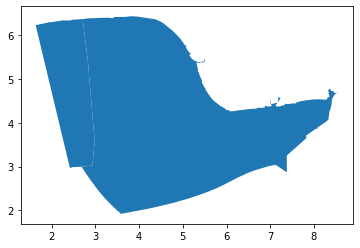

In [17]:
ret_df = off_shore.copy()
off_shore.plot()

for c_code in ["SD", "KE"]:
    selection = (ret_df.name == c_code)
    n_offshore_shapes = selection.sum()

    if n_offshore_shapes > 1:
        # when multiple shapes per country, then merge polygons
        
        geom = ret_df[selection].geometry.unary_union
        print("TO DROP: ", ret_df[selection].index)
        ret_df.drop(ret_df[selection].index, inplace=True)
        ret_df.iloc[-1] = [c_code, geom]
ret_df.plot()
        

In [18]:
ret_df

,name,geometry
0,BJ,"POLYGON ((2.82397 5.44567, 2.98419 3.57678, 2...."
1,NG,"MULTIPOLYGON (((8.54140 4.70052, 8.53477 4.698..."
